In [5]:
import numpy as np

import h5py as h5
print(os.getcwd())
f = h5.File('test_mo_7.h5','r+')

f.keys()

/content


OSError: ignored

In [ ]:
ref = np.asarray(f['synced_reference_buffer'])
pos = np.asarray(f['decoded_position'])
vel = np.asarray(f['decoded_velocity'])
emg = np.asarray(f['filtered_emg'])
dec = np.asarray(f['W'])
dec = dec.reshape(pos.shape[0]*emg.shape[0],dec.shape[-1])

# sampling rate ???
Hz = 60
dt = 1/Hz
time = np.arange(ref.shape[1])*dt

In [ ]:
%matplotlib inline

In [ ]:
# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# render animation
mpl.rc('animation',html='html5')
# animation
from matplotlib import animation as ani
# Matlab-style plotting
import matplotlib.pyplot as plt

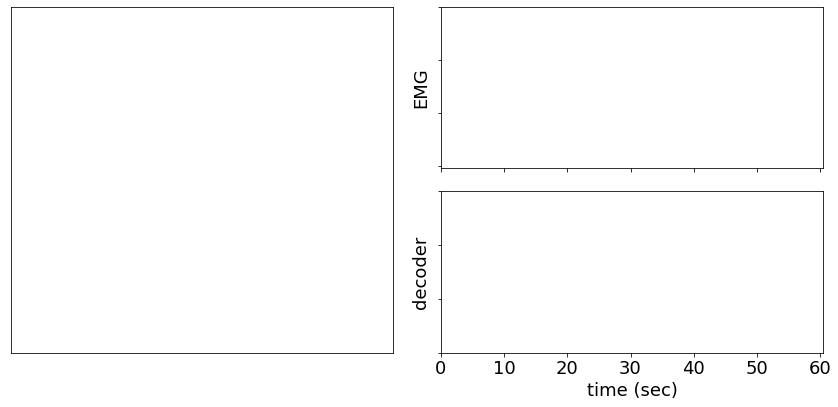

In [ ]:
fig = plt.figure(figsize=(12,6)); 

axt = plt.subplot2grid((2, 2), (0, 0), rowspan=2)
axe = plt.subplot2grid((2, 2), (0, 1))
axd = plt.subplot2grid((2, 2), (1, 1))

nl = 10
lim = 45
dj = int(2*Hz/nl)

refl = [axt.plot([], [], '-', color='red', lw=2, solid_capstyle='butt')[0] for l in range(nl)]
posl = [axt.plot([], [], '-', color='blue', lw=2, solid_capstyle='butt')[0] for l in range(nl)]
refd, = axt.plot([], [], '.', color='red', ms=30);
posd, = axt.plot([], [], '.', color='blue', ms=20);

emgl = [axe.plot([], [])[0] for l in emg]
decl = [axd.plot([], [], '.-')[0] for l in dec]

#plt.close(fig)

# initialization -- called once
def init():
    for l in refl:
        l.set_data([], [])
    for l in posl:
        l.set_data([], [])
    refd.set_data([], [])
    posd.set_data([], [])
    axt.set_xlim(( -lim, +lim))
    axt.set_ylim(( -lim, +lim))
    axt.set_xticks([])
    axt.set_yticks([])
    #
    for l in emgl:
        l.set_data([], [])
    axe.set_xticklabels([])
    axe.set_yticklabels([])
    axe.set_xlim(time[0],time[-1])
    axe.set_ylim(-1e-5,6e-4)
    axe.set_ylabel('EMG')
    #
    for l in decl:
        l.set_data([], [])
    axd.set_yticklabels([])
    axd.set_xlim(time[0],time[-1])
    axd.set_ylim(-1e6,+5e5)
    axd.set_xlabel('time (sec)')
    axd.set_ylabel('decoder')
    #
    plt.tight_layout()
    return refl+posl+[refd,posd]+emgl+decl

# animation -- called iteratively
def animate(t):
    j = (t >= time).nonzero()[0]
    d = int(t//10)+1
    for li,l in enumerate(refl):
        l.set_data(ref[0,j[-(li+1)*dj-2:-(li)*dj-1]],
                   ref[1,j[-(li+1)*dj-2:-(li)*dj-1]])
        l.set_alpha(1-li/nl)
    for li,l in enumerate(posl):
        l.set_data(pos[0,j[-(li+1)*dj-2:-(li)*dj-1]],
                   pos[1,j[-(li+1)*dj-2:-(li)*dj-1]])
        l.set_alpha(1-li/nl)
    refd.set_data(ref[0,j[-1]],ref[1,j[-1]])
    posd.set_data(pos[0,j[-1]],pos[1,j[-1]])
    for li,l in enumerate(emgl):
        l.set_data(time[j],emg[li,j])
    for li,l in enumerate(decl):
        l.set_data(10*np.arange(d),dec[li,np.arange(d)])
    return refl+posl+[refd,posd]+emgl+decl


a = ani.FuncAnimation(fig, animate, init_func=init, repeat=True,
                      frames=np.arange(0.,time[-1],dt), interval=1000*dt, blit=True)

In [ ]:
init(); animate(50);

In [ ]:
a.save('viz.mp4')

<Figure size 432x288 with 0 Axes>

In [ ]:
ani.FuncAnimation?